In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
isInKaggle=False
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

if isInKaggle:
    import os
    for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
            print(os.path.join(dirname, filename))
else:
    for dirname, _, filenames in os.walk('../data/titanic'):
        for filename in filenames:
            print(os.path.join(dirname, filename)) 
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../data/titanic\gender_submission.csv
../data/titanic\test.csv
../data/titanic\train.csv


In [2]:
#Root path
ROOT = "../data/titanic/"
if isInKaggle:
    ROOT = "/kaggle/input/titanic/"

> # **Starting the descriptive analysis train.csv**

In [4]:
import pandas as pd
data = pd.read_csv(ROOT+"train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Descriptive Statistics**


[Here](https://www.datavedas.com/descriptive-statistics-in-python/) is a googd reference.

[Here](https://pandas.pydata.org/pandas-docs/stable/reference/) you have the documentation regarding `pandas` package.

In [5]:
#frequency distributions
#pd.value_counts(data["Survived"]).to_frame(name='Frequency').rename_axis('Survived', 1).sort_index()
#data.groupby('Survived').describe()
#data.Survived.value_counts()
print(data.Pclass.value_counts(normalize = True).reset_index(name='Frequency').rename(columns={'index':'Pclass'}))
print(data.Embarked.value_counts().reset_index(name='Frequency').rename(columns={'index':'Embarked'}))

   Pclass  Frequency
0       3   0.551066
1       1   0.242424
2       2   0.206510
  Embarked  Frequency
0        S        644
1        C        168
2        Q         77


In [6]:
#Functions for studying the association between 'Survived' and the remaining Titanic ones
def qualiQualiVariablesAnalysis (varName1, varName2):
    SQ_tb = pd.crosstab(index=data[varName1], columns=data[varName2], normalize = "index")#, margins = True
    title = "Conditional Proportion: " + varName2  + " per " + varName1 
    print("******** " + title + " ********")
    print(SQ_tb)
    Stacked = SQ_tb.plot(kind="bar",figsize=(8,8),stacked=False,title=title,fontsize=12)
    Stacked.set_ylabel("%",fontsize=12)
    Stacked.set_xlabel(varName1,fontsize=12)
    #return (SQ_tb)

def qualiQuantiVariablesAnalysis (varName1, varName2):
    title = varName1 + " per " + varName2
    print("******** " + title + " ********")
    print(data[[varName1, varName2]].groupby(varName2).describe())
    boxVarS = data.boxplot(column=varName1,figsize=(8,8),vert=True, by=varName2)
    boxVarS.set_ylabel(varName1,fontsize=12)
    boxVarS.set_xlabel(varName2,fontsize=12)

#survivedPerQuali("Pclass")#pd.crosstab(index=data["Pclass"], columns=data["Survived"], normalize = "index")#, margins = True
#survivedPerQuanti("Age")


******** Age per Survived ********
            Age                                                    
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0


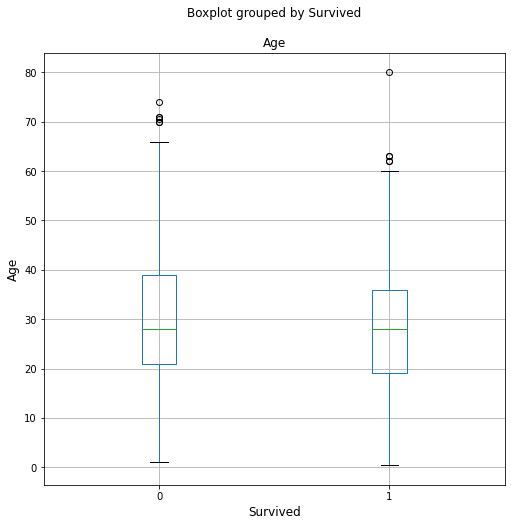

In [7]:
# data[["Age", "Survived"]].head()
# data[["Age", "Survived"]].groupby("Survived").describe()
qualiQuantiVariablesAnalysis("Age", "Survived")

In [8]:
types = data.dtypes
isQuali = (types=="object")
isQuali = isQuali[isQuali].index
isQuanti = (types!="object")
isQuanti = isQuanti[isQuanti].index
isQuanti = isQuanti.drop(['Survived', 'PassengerId', 'Age'])
isQuali = isQuali.drop(['Name', 'Ticket', 'Cabin'])
print("isQuali")
print(isQuali)
print("isQuanti")
print(isQuanti)

isQuali
Index(['Sex', 'Embarked'], dtype='object')
isQuanti
Index(['Pclass', 'SibSp', 'Parch', 'Fare'], dtype='object')


**FIGURES & BIVARIATE TABLES**

=============== QUALITATIVE PREDICTORS ===============
******** Conditional Proportion: Survived per Sex ********
Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908
******** Conditional Proportion: Survived per Embarked ********
Survived         0         1
Embarked                    
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.663043  0.336957
******** Conditional Proportion: Embarked per Sex ********
Embarked         C         Q         S
Sex                                   
female    0.233974  0.115385  0.650641
male      0.164645  0.071057  0.764298
=============== QUANTITATIVE PREDICTORS ===============
******** Pclass per Survived ********
         Pclass                                             
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  2.531876  0.735805  1.0  2.0  3.0  3.0  3.0
1       

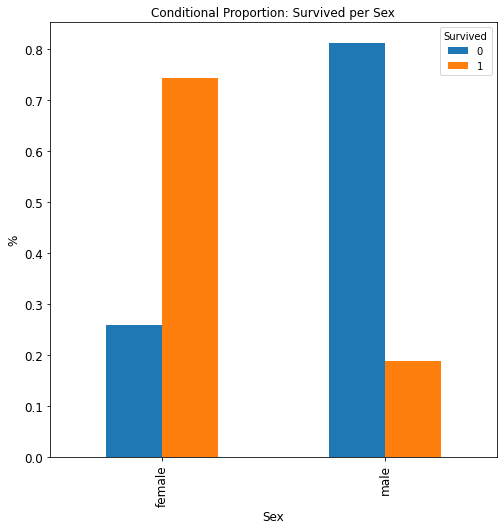

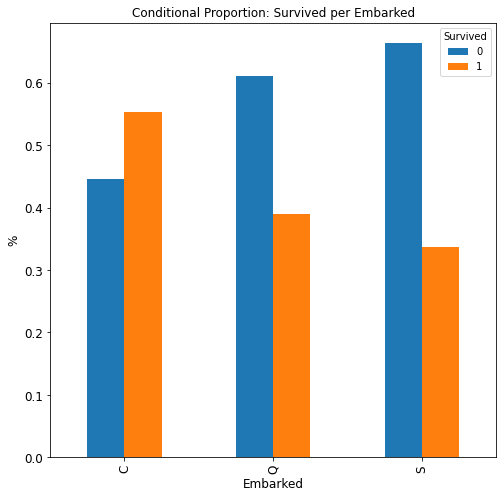

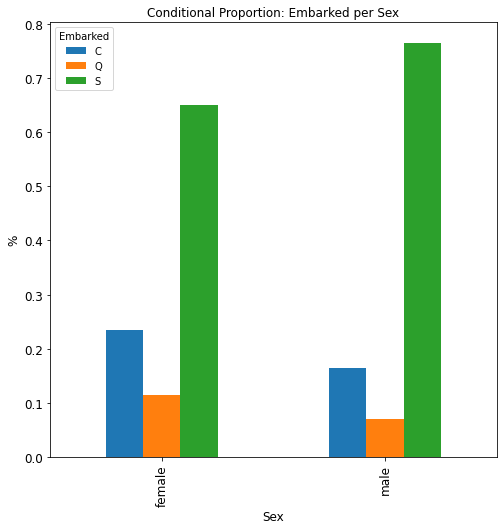

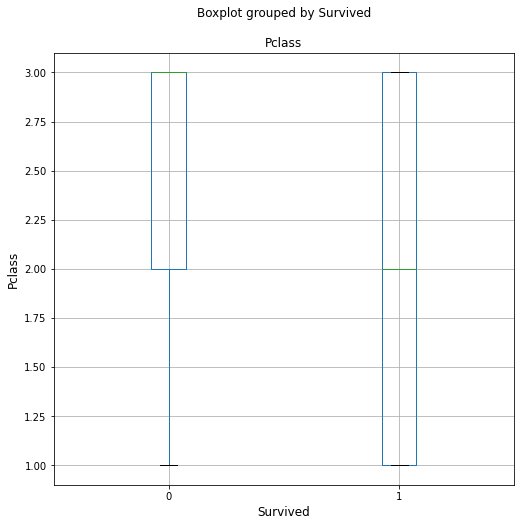

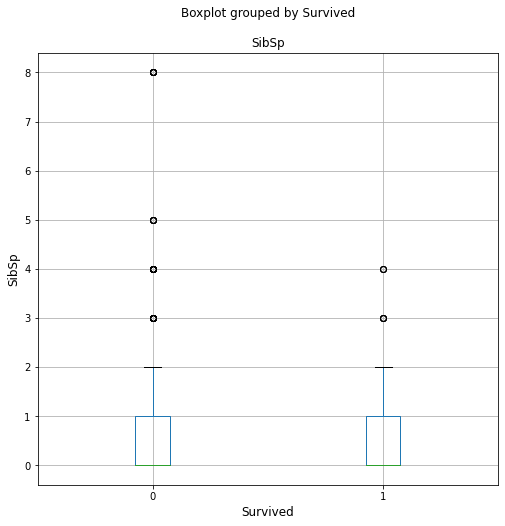

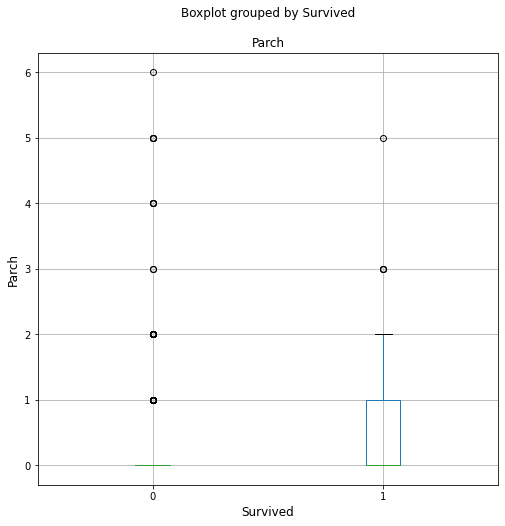

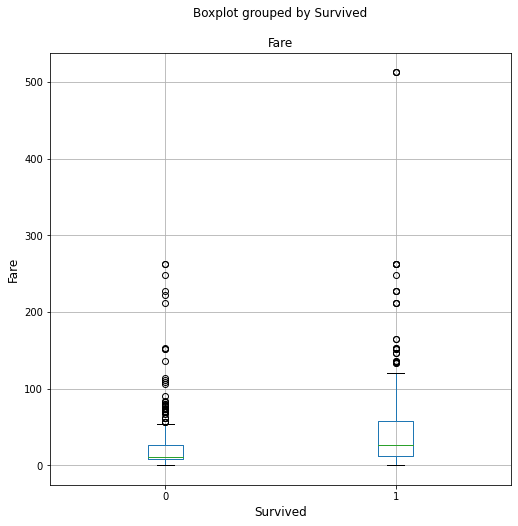

In [9]:
print("=============== QUALITATIVE PREDICTORS ===============")
for qualiVar in isQuali:
    qualiQualiVariablesAnalysis (qualiVar, "Survived")
qualiQualiVariablesAnalysis ('Sex', 'Embarked')

print("=============== QUANTITATIVE PREDICTORS ===============")
for quantiVar in isQuanti:
    qualiQuantiVariablesAnalysis(quantiVar, "Survived")


AxesSubplot(0.125,0.125;0.775x0.755)


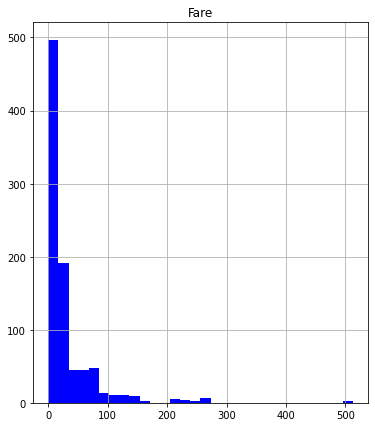

In [10]:
myHist = data.hist(column="Fare",figsize=(6,7),color="blue",bins=round(len(data)**.5))#,range=(55,90))
print(myHist.max())
# data.

#Bayesian network model

In [18]:
# Content available in page https://analyticsindiamag.com/a-guide-to-inferencing-with-bayesian-network-in-python/
# PACKAGE INSTALLATION AND LOADING
# pip install pgmpy
# !pip install ipywidgets
from pgmpy.inference import VariableElimination
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
# import pylab as plt
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# Defining Bayesian Structure
# arcs from the cause to the effect
model = BayesianNetwork([('Sex', 'Survived'),
                         ('Embarked', 'Survived'),
                         ('Pclass', 'Survived')])
# Defining the CPDs:
# PRIORS


def getPrior(varName):
    """Function to automatically compute the marginal (prior) probability 
    distribution of a variable
    """
    tb = data[varName].value_counts(normalize=True, sort=False).reset_index(
        name='Prop').rename(columns={'index': varName, }).sort_values(by=varName)
    # tb = data[varName].value_counts(normalize=True, sort = False).reset_index(name='Prop').rename(columns={'index': varName})
    # print(tb)
    cpd = TabularCPD(variable=varName,
                     variable_card=len(tb),
                     values=np.array(tb.Prop.tolist()
                                     ).reshape(len(tb), 1),
                     state_names={varName: tb[varName].tolist()})
    print('*********** ' + varName + ' CPD ***********')
    print(cpd)
    return (cpd)


# FUNCTION CALLS
cpdSex = getPrior('Sex')
cpdPclass = getPrior('Pclass')
cpdEmbarked = getPrior('Embarked')


*********** Sex CPD ***********
+-------------+----------+
| Sex(female) | 0.352413 |
+-------------+----------+
| Sex(male)   | 0.647587 |
+-------------+----------+
*********** Pclass CPD ***********
+-----------+----------+
| Pclass(1) | 0.242424 |
+-----------+----------+
| Pclass(2) | 0.20651  |
+-----------+----------+
| Pclass(3) | 0.551066 |
+-----------+----------+
*********** Embarked CPD ***********
+-------------+-----------+
| Embarked(C) | 0.188976  |
+-------------+-----------+
| Embarked(Q) | 0.0866142 |
+-------------+-----------+
| Embarked(S) | 0.724409  |
+-------------+-----------+


In [23]:
# LIKELIHOODS
def getLikelihood(effectVar, causeVars):
    myColumns = []
    for cause in causeVars:
        myColumns.append(data[cause])
    # , margins = True
    SQ_tb = pd.crosstab(index=data[effectVar],
                        columns=myColumns, normalize="columns")
    title = "crosstab: " + effectVar + " per " + str(causeVars)
    print("******** " + title + " ********")
    print(SQ_tb)
 
    state_names = {}
    evidence_card = []
    for i in reversed(range(len(SQ_tb.axes))):
        SQ_tbi_frame = SQ_tb.axes[i].to_frame()
        for varName in SQ_tb.axes[i].names:
            aux = SQ_tbi_frame[varName]
            tb = aux.value_counts(normalize=True).reset_index(
                name='Prop').rename(columns={'index': varName})
            varAlternatives = tb[varName].tolist()
            evidence_card.append(len(varAlternatives))
            state_names_local = {varName: varAlternatives}
            state_names.update(state_names_local)
    evidence_card = evidence_card[:-1]
    print("******** state_names ********")
    print(state_names)
    cpd = TabularCPD(variable=effectVar,
                     variable_card=len(SQ_tb),
                     values=SQ_tb,  # np.array(tb.Prop.tolist()
                      #).reshape(len(SQ_tb), 1),
                     state_names=state_names, 
                     evidence=causeVars, 
                     evidence_card=evidence_card)

    title = "CPD: " + effectVar + " per " + str(causeVars)
    print("******** " + title + " ********")
    print(cpd)
    return (cpd)


cpdSurvived = getLikelihood(effectVar='Survived', causeVars=[
                            'Sex', 'Pclass', 'Embarked'])


******** crosstab: Survived per ['Sex', 'Pclass', 'Embarked'] ********
Sex         female                                                         \
Pclass           1                   2                        3             
Embarked         C    Q         S    C    Q         S         C         Q   
Survived                                                                    
0         0.023256  0.0  0.041667  0.0  0.0  0.089552  0.347826  0.272727   
1         0.976744  1.0  0.958333  1.0  1.0  0.910448  0.652174  0.727273   

Sex                  male                                              \
Pclass                  1                  2                        3   
Embarked      S         C    Q        S    C    Q         S         C   
Survived                                                                
0         0.625  0.595238  1.0  0.64557  0.8  1.0  0.845361  0.767442   
1         0.375  0.404762  0.0  0.35443  0.2  0.0  0.154639  0.232558   

Sex                        

In [28]:
print(cpdSurvived.values)
# print(cpdSurvived.variables)
# print(cpdSurvived.cardinality)
print(cpdSurvived.variable)
print(cpdSurvived.variable_card)

[[[[0.02325581 0.         0.04166667]
   [0.         0.         0.08955224]
   [0.34782609 0.27272727 0.625     ]]

  [[0.5952381  1.         0.64556962]
   [0.8        1.         0.84536082]
   [0.76744186 0.92307692 0.87169811]]]


 [[[0.97674419 1.         0.95833333]
   [1.         1.         0.91044776]
   [0.65217391 0.72727273 0.375     ]]

  [[0.4047619  0.         0.35443038]
   [0.2        0.         0.15463918]
   [0.23255814 0.07692308 0.12830189]]]]
Survived
2


In [24]:
print(cpdSex.values)
print(cpdSex.variables)
print(cpdSex.cardinality)
print(cpdSex.variable)
print(cpdSex.variable_card)
print(cpdSex.state_names)

[0.35241302 0.64758698]
['Sex']
[2]
Sex
2
{'Sex': ['female', 'male']}


In [25]:

# Associating the CPDs with the network structure.
model.add_cpds(cpdSex, cpdPclass, cpdEmbarked, cpdSurvived)
print(model.check_model())

True


In [35]:
# PLOT THE MODEL
# nx.draw(model, with_labels=True)
# plt.show()
# plt.savefig('BBN_model.png')
# plt.close()

# BBN (for qualitative analysis)
# COMPUTING THE POSTERIOR/MARGINAL DISTRIBUTIONS
def getPosterior(Sex, Pclass, Embarked):
    # {'Sex': 'female',  # ['female', 'male'],
            # 'Pclass': 1,  #[1,  2, 3],
            # 'Embarked': 'C'  # ['C', 'Q', 'S']}
    evidence = {'Sex': Sex,  'Pclass': Pclass, 'Embarked': Embarked}
    infer = VariableElimination(model)
    posterior_p = infer.query(['Survived'], evidence=evidence)
    print('**************** CPD to Survive given ' + str(evidence)+ '****************')
    print(posterior_p)
    return (posterior_p)


getPosterior(Sex= 'female', Pclass=2, Embarked='S')
getPosterior(Sex= 'male', Pclass=2, Embarked='S')


0it [00:00, ?it/s]

0it [00:00, ?it/s]

**************** CPD to Survive given {'Sex': 'female', 'Pclass': 2, 'Embarked': 'S'}****************
+-------------+-----------------+
| Survived    |   phi(Survived) |
+=============+=================+
| Survived(0) |          0.0896 |
+-------------+-----------------+
| Survived(1) |          0.9104 |
+-------------+-----------------+


0it [00:00, ?it/s]

0it [00:00, ?it/s]

**************** CPD to Survive given {'Sex': 'male', 'Pclass': 2, 'Embarked': 'S'}****************
+-------------+-----------------+
| Survived    |   phi(Survived) |
+=============+=================+
| Survived(0) |          0.8454 |
+-------------+-----------------+
| Survived(1) |          0.1546 |
+-------------+-----------------+


<DiscreteFactor representing phi(Survived:2) at 0x21d7592dc60>